# Benford's Law and Zipf's Law: Finding Hidden Patterns in Data
## Fundamentals of AI Course Project

> **Team Members:**
> - Sandesh Lendve
    sandesh.lendve@adypu.edu.in
> - Swarnim Balpande
    swarnim.balpande@adypu.edu.in
> - Neha Sharma
    neha.k@adypu.edu.in
> - Tisha Kharade
    tisha.kharade@adypu.edu.in
>
> **Submission Date:** May 4, 2025

## Introduction

In this project, we explore a fascinating mathematical pattern that emerge in natural data:

1. **Benford's Law** - A pattern in the distribution of leading digits in many real-life numerical datasets

These law reveal hidden structures in seemingly random data and have applications ranging from fraud detection to linguistics and natural language processing.

### What is Benford's Law?

Benford's Law, also known as the First-Digit Law, is an observation about the frequency distribution of leading digits in many real-life datasets. It states that in many naturally occurring collections of numbers, the leading digit is likely to be small. More specifically, the digit 1 appears as the leading significant digit about 30% of the time, while larger digits occur with decreasing frequency.

**Key takeaways:**

* **Not a random distribution:** Benford's Law highlights that the distribution of leading digits is often not uniform (where each digit has an equal chance of appearing).
* **Applies to diverse datasets:**  It applies to a wide range of datasets, including financial data, population numbers, physical constants, and even street addresses.
* **Mathematical Basis:** The probability of a digit *d* (where *d* is in the range 1 to 9) being the first digit is given by the formula:

$$P(d) = \log_{10}(1 + \frac{1}{d})$$

**Examples:**

* **Financial data:** In accounting, Benford's Law is often used to detect fraud. If a set of financial records deviates significantly from the expected distribution of leading digits, it could indicate manipulation.
* **Natural phenomena:** The lengths of rivers, the areas of countries, and the magnitudes of earthquakes often follow Benford's Law.

**Important Considerations:**

* **Not universally applicable:**  Benford's Law does not apply to all datasets. For instance, it wouldn't apply to data with assigned numbers like phone numbers or ID cards, data with a defined range (like test scores), or data that is purely random.
* **Sample Size:** The dataset needs to be large and diverse enough for Benford's Law to be reliably observed.




# Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Datasets

In [ ]:
# Load the COVID Data from the CSV file
twitter_df = pd.read_csv("/content/drive/MyDrive/maths/Benford_data/twitter_data.csv" , on_bad_lines='skip')

In [ ]:
twitter_df

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
1969527638,LlngoMakeEmCum_,"[ ""#nationaldogday"" ]",http://pbs.twimg.com/profile_images/534286217882652672/FNmiQYVO_normal.jpeg,319,112,en,1472271687519,769310701580083200,"[ ""1969574754""","""1969295556""","""1969284056""","""1969612214""","""1970067476""","""1969797386""","""1969430539""","""1969840064""","""1969698176""","""1970005154""","""283011644""","""1969901029""","""1969563175""","""1969302314""","""1969978662""","""1969457936""","""1969667533""","""1969547821""","""1969943478""","""1969668032""","""283006529""","""1969809440""","""1969601096""","""1969298856""","""1969331652""","""1969385498""","""1969674368""","""1969565263""","""1970144676""","""1969745390""","""1969947438""","""1969734134""","""1969801326""","""1969324008""","""1969259820""","""1969535827""","""1970072989""","""1969771688""","""1969437804""","""1969507394""","""1969509972""","""1969751588""","""283012808""","""1969302888""","""1970224440""","""1969603532""","""283011244""","""1969501046""","""1969887518""","""1970153138""","""1970267527""","""1969941955""","""1969421654""","""1970013110""","""1969544905""","""1969839590""","""1969876500""","""1969674625""","""1969337952""","""1970046536""","""1970090934""","""1969419133""","""1969517215""","""1969787869""","""1969298065""","""1970149771""","""1969422638""","""1969504268""","""1970025554""","""1969776001""","""1970138611""","""1969316186""","""1969547558""","""1969689272""","""283009727""","""283015491""","""1969526874""","""1969662210""","""1969536164""","""1969320008""","""1969893793""","""1970158393""","""1969365936""","""1970194418""","""1969942094""","""1969631580""","""1969704756""","""1969920092""","""1969712882""","""1969791680""","""1969408164""","""1969754851""","""1970205480""","""1969840267""","""1969443211""","""1969706762""","""1969692698""","""1969751576""","""1969486796""","""1969286630""","""1969686674""","""1969833492""","""1969294814""","""1969472719""","""1969685018""","""283008559""","""283011243""","""1969680078""","""1969545697""","""1969646412""","""1969442725""","""1969692529"" ]"
1969604874,reml_conway,"[ ""#backtohogwarts"" ]",http://pbs.twimg.com/profile_images/534277126883901440/laUhqSHr_normal.jpeg,228,112,en,1472735923879,771336465124986880,"[ ""283011482""","""1969331228""","""1969616599""","""1970201022""","""1969967443""","""1969530366""","""1969592875""","""1969695488""","""1969791360""","""1969716620""","""1969671817""","""1969669044""","""1969764865""","""1969740193""","""1969729298""","""1969435255""","""1969613046""","""1969351873""","""1969600392""","""1969512242""","""1969774399""","""1969574840""","""1969448726""","""1969798825""","""1969981423""","""1969351897""","""283010946""","""1969468614""","""1969334568""","""283007190""","""1969763984""","""1969624730""","""283007538""","""1969979214""","""1970150629""","""1970259193""","""1969944115""","""1969897742""","""1969453051""","""1969826186""","""1969676426""","""1969635092""","""1969535827""","""1969370425""","""1969452247""","""1969564466""","""1970001150""","""1969411104""","""1969995840""","""1970190690""","""1969734540""","""1970219671""","""1969440758""","""1969388256""","""1969591850""","""1969864562""","""1969893884""","""1970225840""","""1969511881""","""1969714802""","""1970020092""","""1969518536""","""1969234446""","""1969848331""","""1969998786""","""1969679612""","""1969261380""","""1969776001""","""1969877786""","""1970016326""","""1970059748""","""1969825172""","""1970271061""","""1969992902""","""283011700""","""1970041760""","""1969659733""","""1969572642""","""1970089340""","""1969644482""","""283011172""","""1969888351""","""1969830894""","""1969766263""","""1969473733""","""1969760288""","""1969796876""","""1969630182""","""1969362121""","""1969633266""","""1970017230""","""1970239106""","""

In [ ]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 751 entries, (np.int64(1969527638), 'LlngoMakeEmCum_', '[ "#nationaldogday" ]', 'http://pbs.twimg.com/profile_images/534286217882652672/FNmiQYVO_normal.jpeg', '319', np.int64(112), 'en', '1472271687519', np.int64(769310701580083200), '[ "1969574754"', ' "1969295556"', ' "1969284056"', ' "1969612214"', ' "1970067476"', ' "1969797386"', ' "1969430539"', ' "1969840064"', ' "1969698176"', ' "1970005154"', ' "283011644"', ' "1969901029"', ' "1969563175"', ' "1969302314"', ' "1969978662"', ' "1969457936"', ' "1969667533"', ' "1969547821"', ' "1969943478"', ' "1969668032"', ' "283006529"', ' "1969809440"', ' "1969601096"', ' "1969298856"', ' "1969331652"', ' "1969385498"', ' "1969674368"', ' "1969565263"', ' "1970144676"', ' "1969745390"', ' "1969947438"', ' "1969734134"', ' "1969801326"', ' "1969324008"', ' "1969259820"', ' "1969535827"', ' "1970072989"', ' "1969771688"', ' "1969437804"', ' "1969507394"', ' "1969509972"', ' "1969751588"', ' "

In [ ]:
twitter_df.describe()

,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
count,549,500,450,396,348,294,237,171,114,63
unique,523,471,423,374,325,276,223,160,114,63
top,"""181561712""","""14222536""","""84279963""","""53338746""","""221412285""","""181561712""","""84279963""","""181561712""","""1969442725""","""1969692529"" ]"
freq,4,6,5,6,5,6,3,4,1,1


In [ ]:
twitter_df.dropna(inplace=True)

# Finding distribution of leading digits of different columns

# Distribution of column ID

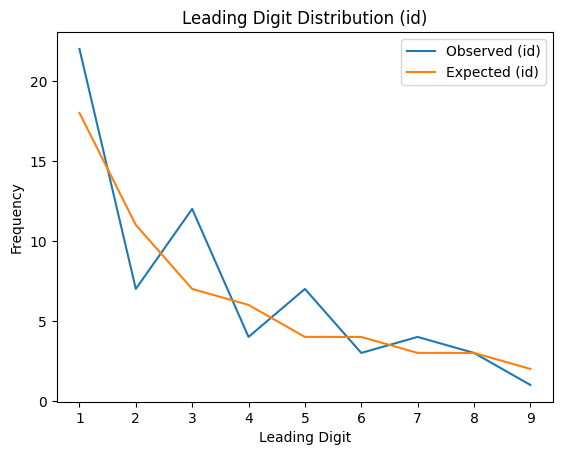

In [ ]:
total_cases_digits = twitter_df["id"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outside 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]

# Define the digits (1 through 9) for the x-axis
digits = range(1, 10)

# Create a line plot for observed frequencies (id)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (id)")

# Create a line plot for expected frequencies (id)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (id)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (id)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column id ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column screenName

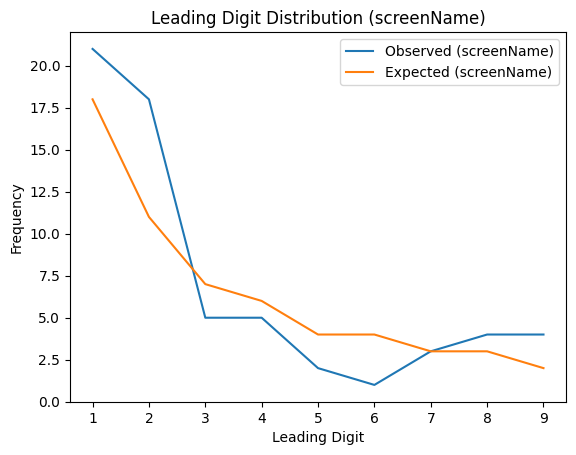

In [ ]:
total_cases_digits = twitter_df["screenName"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outsscreenNamee 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (screenName)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (screenName)")

# Create a line plot for expected frequencies (screenName)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (screenName)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (screenName)")
plt.legend()

# Show the plot
plt.show()


Based on the observed and expected distributions of leading digits for column screenName ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column tags

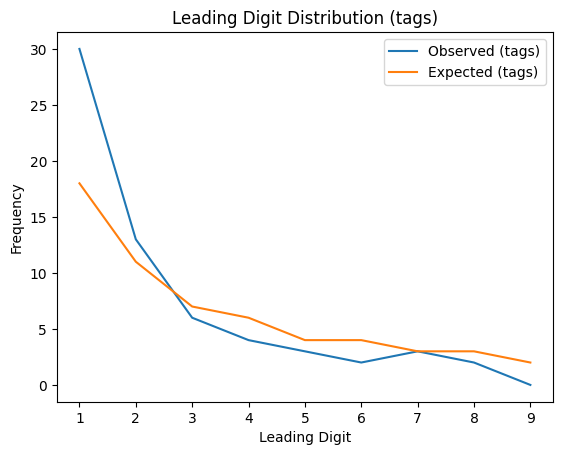

In [ ]:
total_cases_digits = twitter_df["tags"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outstagse 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (tags)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (tags)")

# Create a line plot for expected frequencies (tags)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (tags)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (tags)")
plt.legend()

# Show the plot
plt.show()


Based on the observed and expected distributions of leading digits for column tags ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column avatar

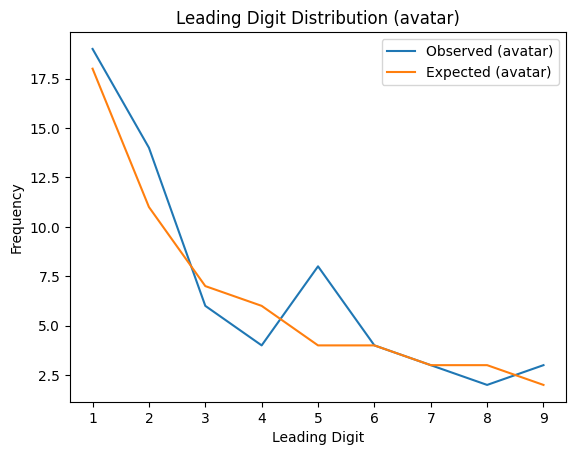

In [ ]:
total_cases_digits = twitter_df["avatar"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outsavatare 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (avatar)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (avatar)")

# Create a line plot for expected frequencies (avatar)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (avatar)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (avatar)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column avtar ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column followersCount

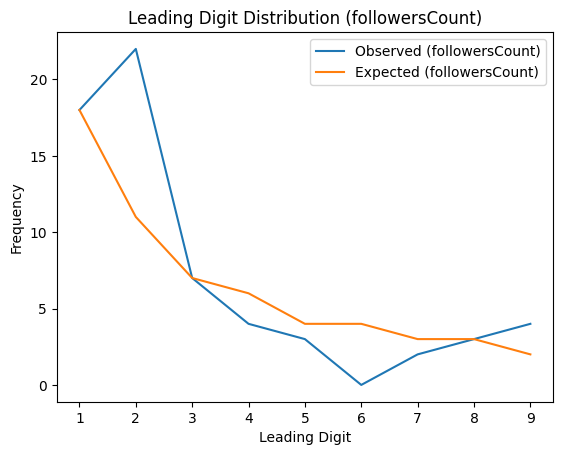

In [ ]:
total_cases_digits = twitter_df["followersCount"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outsfollowersCounte 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (followersCount)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (followersCount)")

# Create a line plot for expected frequencies (followersCount)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (followersCount)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (followersCount)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column followersCount ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column friendsCount

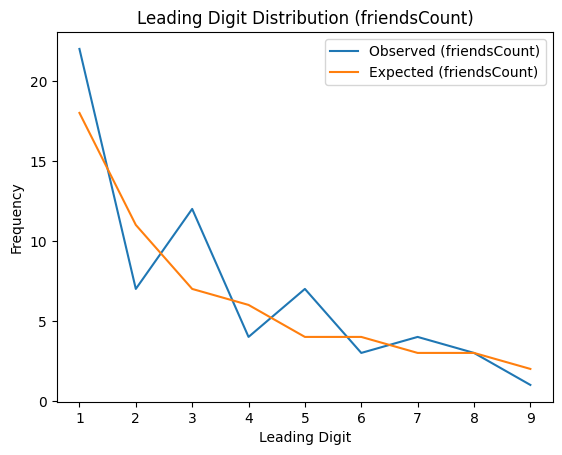

In [ ]:
total_cases_digits = twitter_df["friendsCount"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outsfriendsCounte 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (friendsCount)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (friendsCount)")

# Create a line plot for expected frequencies (friendsCount)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (friendsCount)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (friendsCount)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column friendsCount,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column lang

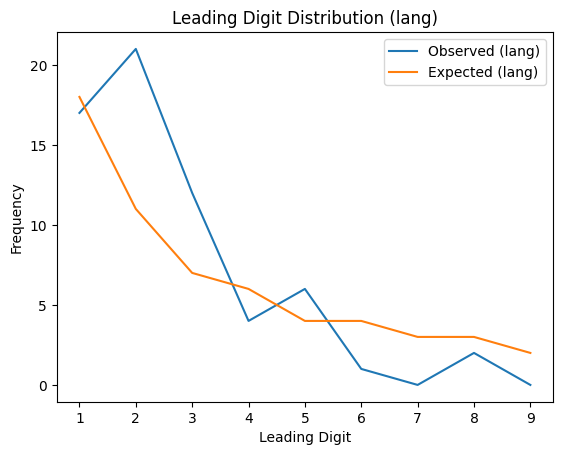

In [ ]:
total_cases_digits = twitter_df["lang"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outslange 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (lang)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (lang)")

# Create a line plot for expected frequencies (lang)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (lang)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (lang)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column lang ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column lastSeen

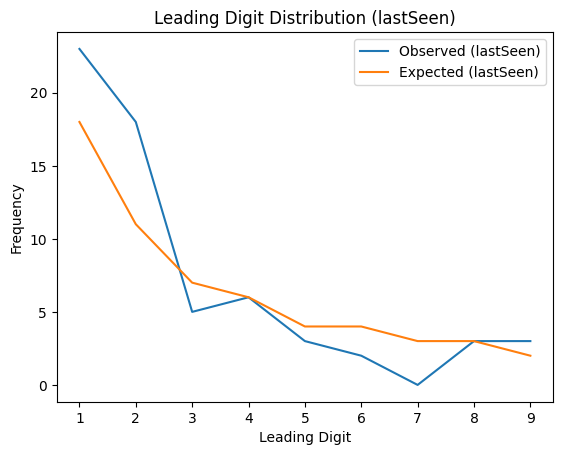

In [ ]:
total_cases_digits = twitter_df["lastSeen"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outslastSeene 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (lastSeen)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (lastSeen)")

# Create a line plot for expected frequencies (lastSeen)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (lastSeen)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (lastSeen)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column lastSeen ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column tweetId

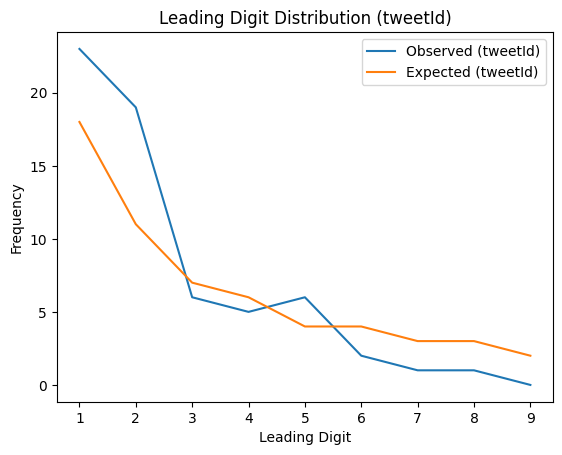

In [ ]:
total_cases_digits = twitter_df["tweetId"].str.strip().str.replace('"', '').astype(int)
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outstweetIde 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (tweetId)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (tweetId)")

# Create a line plot for expected frequencies (tweetId)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (tweetId)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (tweetId)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column tweetId ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.

# Distribution of column friends

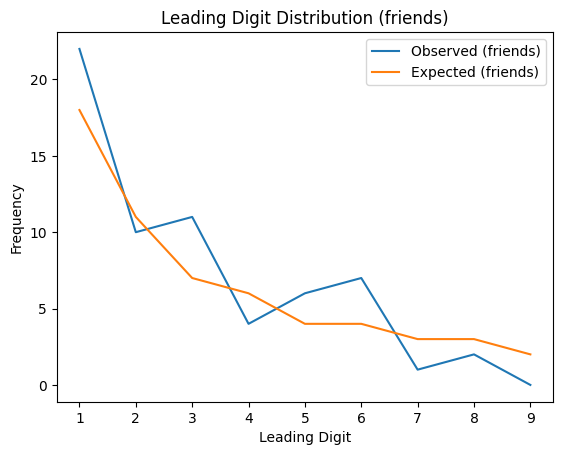

In [ ]:
total_cases_digits = twitter_df["friends"].str.strip().str.replace('"', '').str.replace(']', '').astype(int) # Remove any ']' characters before conversion
total_cases_digits = total_cases_digits.astype(str).str[0].astype(int)
total_cases_digits = total_cases_digits[total_cases_digits.between(1, 9)] # filter out digits outsfriendse 1-9
observed_counts_total_cases = [
    total_cases_digits.astype(str).str.startswith(str(digit)).sum() for digit in range(1, 10)
]
total_records_total_cases = len(total_cases_digits)
expected_counts_total_cases = [
    int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
]
digits = range(1, 10)

# Create a line plot for observed frequencies (friends)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (friends)")

# Create a line plot for expected frequencies (friends)
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (friends)")
# Add labels and a legend
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (friends)")
plt.legend()

# Show the plot
plt.show()

Based on the observed and expected distributions of leading digits for column friends ,
it does not appear to follow Benford's Law.
This suggests that the data in this column may not be naturally occurring or may have been subject to some form of manipulation.


# Overall, the analysis of leading digit distributions across various columns in the Twitter dataset reveals that some columns align with Benford's Law while others do not..
# This indicates the dataset may contain a mix of natural and potentially manipulated or assigned data..
# Further investigation may be needed to explore the specific columns that deviate from the expected distribution to understand the underlying causes..


### Team Contributions

- **Sandesh**
  - Created and developed the main notebook
  - Generated all visualizations

- **Swarnim**
  - Worked on main notebook data
  - Designed and created the presentation

- **Neha**
  - Prepared and analyzed data
  - Contributed to writing

- **Tisha**
  - Cleaned data
  - Contributed to writing and report summarization



THANK YOU